In [7]:
import numpy
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=1000, noise=0.1, random_state=0)  #训练集

testx,testy = make_moons(n_samples=100, noise=0.15, random_state=0)#测试集

In [3]:
def mini_batch_generator(x, y, batch_size):  #每次批量随机选取数据
    m = x.shape[0]  
    indices = numpy.arange(m)  
    numpy.random.shuffle(indices)  
    for start_idx in range(0, m, batch_size):  
        end_idx = min(start_idx + batch_size, m)  
        batch_indices = indices[start_idx:end_idx]  
        yield x[batch_indices], y[batch_indices]  

<function matplotlib.pyplot.show(close=None, block=None)>

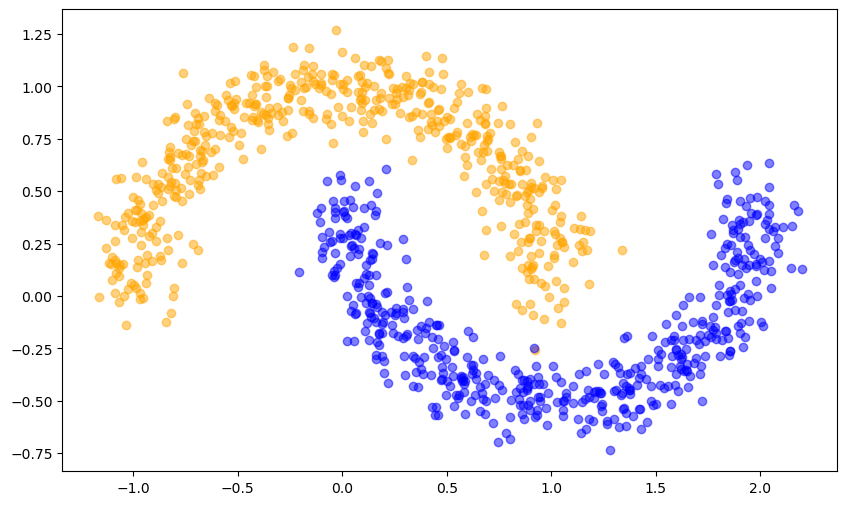

In [2]:
create1 = (y == 0).ravel()#展示原始数据
create2 = (y == 1).ravel()
plt.figure(figsize=(10, 6))
plt.scatter(x[create1][:, 0], x[create1][:, 1], color = 'orange',label='Class 0', alpha=0.5)
plt.scatter(x[create2][:, 0], x[create2][:, 1], color = 'blue',label='Class 1', alpha=0.5)
plt.show



In [4]:
class BP:
    def __init__(self):
        self.weight1 = numpy.random.randn(2,4)
        self.bias1 = numpy.random.randn(1,4)
        self.weight2 = numpy.random.randn(4,2)
        self.bias2 = numpy.random.randn(1,2)
        self.loss = 0

    def forward(self,x):
        self.out1 = numpy.dot(x,self.weight1)+self.bias1
        self.a1 = numpy.tanh(self.out1)
        self.out2 = numpy.dot(self.a1,self.weight2)+self.bias2
        self.a2 = numpy.exp(self.out2)
        self.out = self.a2/numpy.sum(self.a2,axis=1,keepdims=True)
        return numpy.argmax(self.out,axis=1)
    
    
    
    def backword(self,x,y,learning_rate = 0.01,Show = False,train = True):#这里设计兼具反向传播，梯度下降，记录损失等功能，依不同需求选择
        m = y.shape[0]  # 样本数量  
        y_onehot = numpy.zeros((m, 2))  
        y_onehot[numpy.arange(m), y.flatten()] = 1  # 将y转为one-hot编码  
        if Show:
            temp1 = numpy.log(self.out).flatten()
            temp2 = y_onehot.flatten().T
            self.loss = -(numpy.dot(temp1,temp2)/m)
            
        
        # 计算输出层误差  
        d_out = self.out - y_onehot  
        dw2 = numpy.dot(self.a1.T,d_out)/m
        db2 = numpy.sum(d_out, axis=0, keepdims=True) / m
        if train:
            # 反向传播到隐藏层  
            d_out1 = numpy.dot(d_out, self.weight2.T)  
            d_out1 = d_out1 * (1 - numpy.tanh(self.out1)**2)  # tanh 的导数  

            # 计算权重1和偏置1的梯度  
            dw1 = numpy.dot(x.T, d_out1) / m  
            db1 = numpy.sum(d_out1, axis=0, keepdims=True) / m  


            # 更新权重和偏置  
            
            self.weight1 -= learning_rate * dw1  
            self.bias1 -= learning_rate * db1  
            self.weight2 -= learning_rate * dw2  
            self.bias2 -= learning_rate * db2 


        

In [12]:
def plot_decision_boundary(model, x, y):  #绘制预测曲线
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5  
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5  
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, 0.01),  
                         numpy.arange(y_min, y_max, 0.01))  
    Z = model.forward(numpy.c_[xx.ravel(), yy.ravel()])  # 对网格点进行预测  
    Z = Z.reshape(xx.shape)  

    plt.figure(figsize=(10, 6))  
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)  
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu, s=20)  
    plt.title('Decision Boundary')  
    plt.xlabel('Feature 1')  
    plt.ylabel('Feature 2')  
    plt.show()  

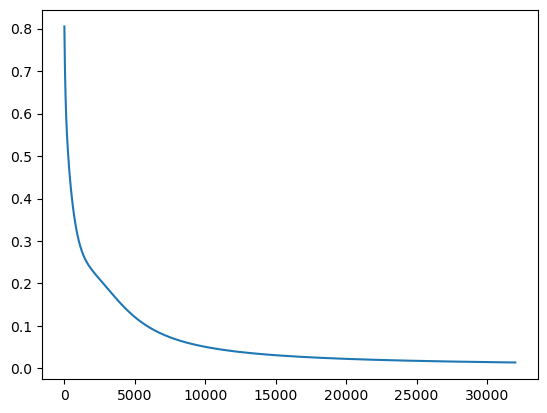

0.99


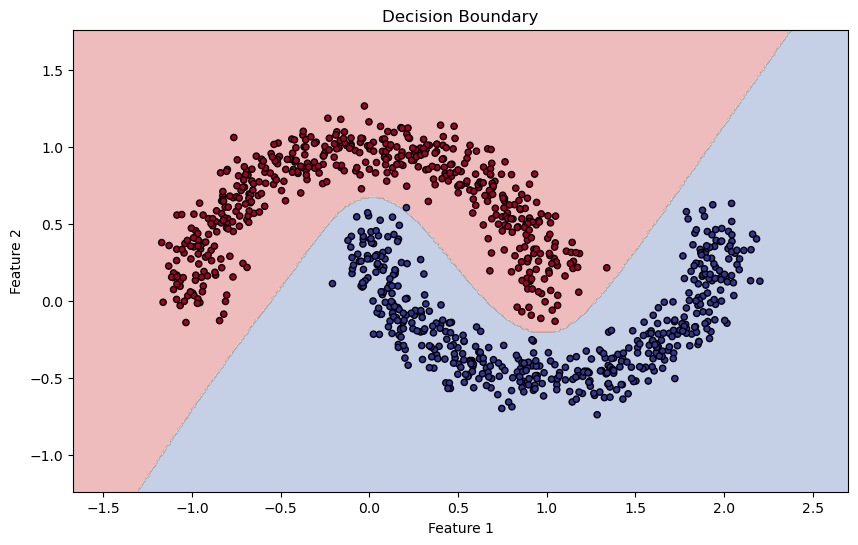

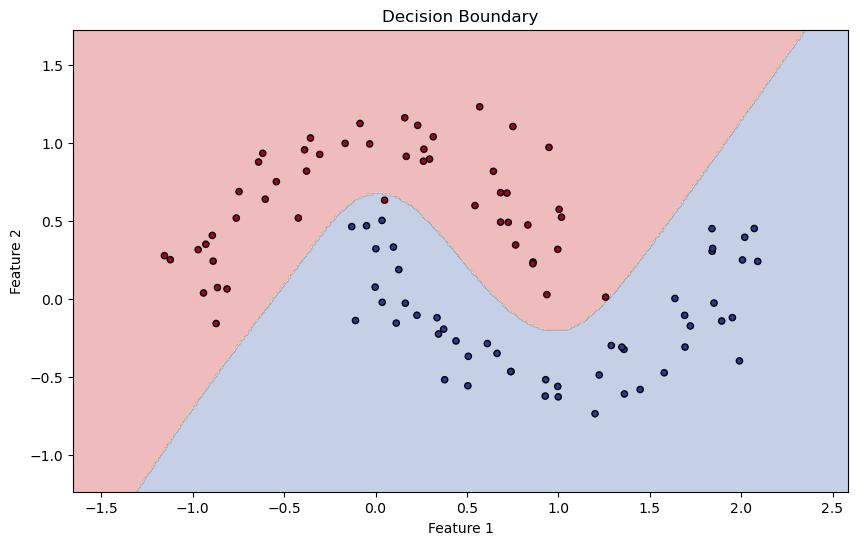

In [14]:
example = BP()
loss_list =[]
for epoch in range(1000):
    for x_batch, y_batch in mini_batch_generator(x, y, 32):
        example.forward(x)
        example.backword(x,y,Show=True)
        loss_list.append(example.loss)
plt.plot(range(32000),loss_list)
plt.show()

result = example.forward(testx)
accuracy = numpy.sum(result == testy)/100
print(accuracy)
plot_decision_boundary(example,x,y)
plot_decision_boundary(example,testx,testy)
